In [1]:
# %pip install torch
# %pip install tensorflow
# %pip install opencv-python
# %pip install numpy
# %pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf 
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# X_train_path = "DOTAv1\\images\\train"
# Y_train_path = "DOTAv1\\labels\\train"
# X_val_path = "DOTAv1\\images\\val"
# Y_val_path = "DOTAv1\\labels\\val"
# X_test_path = "DOTAv1\\images\\test"

# X_train = os.listdir(X_train_path)
# Y_train = os.listdir(Y_train_path)


# X_val = os.listdir(X_val_path)
# Y_val = os.listdir(Y_val_path)
# X_test = os.listdir(X_test_path)
# # print(len(X_train), len(Y_train))
# # print(len(X_val), len(Y_val))
# # print(len(X_test))

# print(len(X_train))
# print(len(Y_train))

input_folder = "DOTAv1\\images\\train"
output_folder = "DOTAv1\\preprocessed_images\\train"
input_labels_folder = "DOTAv1\\labels\\train"
output_labels_folder = "DOTAv1\\preprocessed_labels\\train"


In [5]:
input_folder = "DOTAv1\\images\\train"
output_folder = "DOTAv1\\preprocessed_images\\train"
input_labels_folder = "DOTAv1\\labels\\train"
output_labels_folder = "DOTAv1\\preprocessed_labels\\train"

os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)

def resize_image(input_path, output_path, input_label_path, output_label_path, target_size=(400, 400)):
    try:
        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        previous_size = img.shape[0]

        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        resized_img = resized_img.reshape((500, 500, 1))
        # resized_img = resized_img.astype(np.float32) / 255.0
        cv2.imwrite(output_path, resized_img)
        print(resized_img.shape)
        with open(input_label_path, 'r') as infile, open(output_label_path, 'w') as outfile:
            for line in infile:
                parts = line.strip().split()
                if len(parts) == 9:  # Ensure we have class_id and 8 coordinates
                    class_id = int(parts[0])
                    coords = [float(x) for x in parts[1:]]

                    # Calculate bounding box from polygon
                    x_min = min(coords[0::2])
                    y_min = min(coords[1::2])
                    x_max = max(coords[0::2])
                    y_max = max(coords[1::2])

                    # Convert to center, width, height format and normalize
                    x_center = (x_min + x_max) / 2
                    y_center = (y_min + y_max) / 2 
                    width = (x_max - x_min)
                    height = (y_max - y_min) 

                    # Write new label
                    outfile.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        print(f"Processed {input_path} and {input_label_path}")
        # print(f"Processed {input_path} and {input_label_path}")
    
    except Exception as e:
        print(f"Error processing {input_path}: {e}")



In [6]:
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        label_file_name = filename.replace(".jpg", ".txt")
        input_label_path = os.path.join(input_labels_folder, label_file_name)
        output_label_path = os.path.join(output_labels_folder, label_file_name)
        
        resize_image(input_path, output_path, input_label_path=input_label_path, output_label_path=output_label_path, target_size=(500, 500))

(500, 500, 1)
Processed DOTAv1\images\train\P0000.jpg and DOTAv1\labels\train\P0000.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0001.jpg and DOTAv1\labels\train\P0001.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0002.jpg and DOTAv1\labels\train\P0002.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0005.jpg and DOTAv1\labels\train\P0005.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0008.jpg and DOTAv1\labels\train\P0008.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0010.jpg and DOTAv1\labels\train\P0010.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0011.jpg and DOTAv1\labels\train\P0011.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0012.jpg and DOTAv1\labels\train\P0012.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0013.jpg and DOTAv1\labels\train\P0013.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0018.jpg and DOTAv1\labels\train\P0018.txt
(500, 500, 1)
Processed DOTAv1\images\train\P0020.jpg and DOTAv1\labels\train\P0020.txt
(500, 500, 1)
Processed DOTAv1\i

In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
import random

import os
import cv2
import numpy as np
import tensorflow as tf
import random

def data_load(output_folder, input_labels_folder):
    X = []
    Y = []
    
    FIXED_LABELS = 5
    PADDING_CLASS = 15
    limit = 100
    for file in os.listdir(output_folder):
        if file.endswith('.jpg'):
            img_path = os.path.join(output_folder, file)
            label_file = file.replace('.jpg', '.txt')
            label_path = os.path.join(input_labels_folder, label_file)
            
            with open(label_path, 'r') as f:
                lines = f.readlines()
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = img.astype(np.float32) / 255.0 

            if len(lines) <= FIXED_LABELS:
                # Pad labels if less than 10
                labels = np.zeros((FIXED_LABELS, 5), dtype=np.float32)
                for i, line in enumerate(lines):
                    labels[i] = np.array(line.strip().split(), dtype=np.float32)
                # Set remaining rows to have class 15 and all other values as 0
                for i in range(len(lines), FIXED_LABELS):
                    labels[i, 0] = PADDING_CLASS
                X.append(img)
                Y.append(labels)
            
            else:
                # If there are more than 10 labels, iterate over all labels
                for i in range(0, len(lines), FIXED_LABELS):
                    batch_lines = lines[i:i+FIXED_LABELS]
                    labels = np.zeros((FIXED_LABELS, 5), dtype=np.float32)
                    for j, line in enumerate(batch_lines):
                        labels[j] = np.array(line.strip().split(), dtype=np.float32)
                    # If this batch has fewer than 10 labels, pad the remaining
                    for j in range(len(batch_lines), FIXED_LABELS):
                        labels[j, 0] = PADDING_CLASS
                    X.append(img)
                    Y.append(labels)
                    if i > limit:
                        break
    
    X = np.array(X)
    Y = np.array(Y)
    
    # Add channel dimension
    X = np.expand_dims(X, axis=-1)
    
    # Convert to TensorFlow tensors
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    Y = tf.convert_to_tensor(Y, dtype=tf.float32)
    
    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    
    return dataset

  # Print first 5 label rows

# dataset = data_load(output_folder, input_labels_folder)

In [10]:
# Usage
dataset = data_load(output_folder, output_labels_folder)

# You can then use this dataset directly or apply further transformations

# Example of checking the dataset
for image, labels in dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels.shape)
    print("Sample labels:")
    print(pd.DataFrame(labels).tail())

Image shape: (500, 500, 1)
Labels shape: (5, 5)
Sample labels:
      0         1         2         3         4
0   0.0  0.727871  0.444111  0.034838  0.021265
1   9.0  0.893033  0.619139  0.012129  0.005635
2   9.0  0.820516  0.759906  0.008000  0.008361
3   9.0  0.746064  0.775445  0.012903  0.005998
4  10.0  0.164129  0.302435  0.004129  0.003635


0 [568.3616, 590.6583999999999, 596.232, 579.0968] [350.1272, 346.7832, 358.8512, 363.79519999999997]


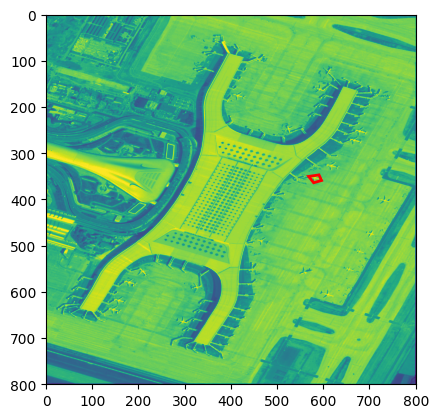

In [ ]:
# model = tf.keras.Model(inputs = inputs, outputs = ["classifier_head", "regressor_head"])
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import os
image = os.path.join(output_folder, os.listdir(output_folder)[0])
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

text_file = os.listdir(output_folder)[0].replace(".jpg", ".txt")

coords_x = []
coords_y = []
with open(os.path.join(input_labels_folder, text_file), "r") as f:
    line = f.readlines()[0]
    line = line.split()
    label = line[0]
    coords_x = [float(elt) * 800 for elt in line[1:9:2]]
    coords_y = [float(elt) * 800 for elt in line[2:9:2]]

print(label, coords_x, coords_y)


# Define the coordinates of the polygon

points = list(zip(coords_x, coords_y))

# Load the image
image_path = image  # Replace with your image path
img = mpimg.imread(image_path)

# Create a new figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create the polygon and add it to the plot
polygon = Polygon(points, closed=True, fill=None, edgecolor='r', linewidth=2)
ax.add_patch(polygon)

# Set the x and y axis limits to show the entire image
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Show the plot
plt.show()

In [11]:
import tensorflow as tf

def one_hot_encoding(image, labels, max_labels, num_classes=15):
    # Create a mask for valid labels (class_id != 15)
    mask = tf.not_equal(labels[:, 0], 15)
    
    # Apply mask to get only valid labels
    valid_labels = tf.boolean_mask(labels, mask)
    
    # Convert class IDs to integers and apply one-hot encoding
    class_ids = tf.cast(valid_labels[:, 0], tf.int32)
    one_hot_classes = tf.one_hot(class_ids, num_classes)
    
    # Extract bounding box coordinates
    bounding_boxes = valid_labels[:, 1:]
    
    # Calculate the number of valid labels
    num_valid_labels = tf.shape(valid_labels)[0]
    
    # Ensure we don't have negative padding
    padding_size = tf.maximum(0, max_labels - num_valid_labels)
    
    # Combine one-hot encoded classes with bounding box coordinates
    paddings_class = [[0, padding_size], [0, 0]]
    paddings_box = [[0, padding_size], [0, 0]]
    
    one_hot_classes_padded = tf.pad(one_hot_classes, paddings_class, constant_values=0)
    bounding_boxes_padded = tf.pad(bounding_boxes, paddings_box, constant_values=0)
    
    # Ensure the output tensors have the correct shape
    one_hot_classes_padded = tf.ensure_shape(one_hot_classes_padded, [max_labels, num_classes])
    bounding_boxes_padded = tf.ensure_shape(bounding_boxes_padded, [max_labels, 4])
    
    return image, (one_hot_classes_padded, bounding_boxes_padded)


def tune_dataset(dataset, max_labels, batch_size, num_classes=15, shuffle=True, cache=True, prefetch=True):
    """
    Tune the dataset by applying one-hot encoding, batching, and optimizing performance.
    
    Args:
    dataset (tf.data.Dataset): The input dataset.
    max_labels (int): Maximum number of labels per image.
    batch_size (int): The size of batches to create.
    num_classes (int): Number of classes for one-hot encoding.
    shuffle (bool): Whether to shuffle the dataset.
    cache (bool): Whether to cache the dataset.
    prefetch (bool): Whether to prefetch batches.
    
    Returns:
    tf.data.Dataset: The tuned dataset.
    """
    
    # Apply one-hot encoding
    dataset = dataset.map(
        lambda img, labels: one_hot_encoding(img, labels, max_labels, num_classes),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    # Cache the dataset if requested
    if cache:
        dataset = dataset.cache()
    
    # Shuffle the dataset if requested
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    
    # Batch the dataset
    dataset = dataset.batch(batch_size)
    
    # Prefetch batches if requested
    if prefetch:
        dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset


# Apply the one-hot encoding to the dataset
# one_hot_encoded_dataset = dataset.map(lambda x, y: one_hot_encoding(x, y, num_classes=15, max_labels=10))
# # Tune the dataset for training
train_dataset = tune_dataset(dataset, max_labels=5, batch_size=16)
print(train_dataset)

# Inspect a batch from the dataset
for image, labels in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels[0].shape, labels[1].shape)
    print("First label:", labels[0])
    print("Labels length: ", len(labels))  # First label of first image in batch

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 500, 500, 1), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 5, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 4), dtype=tf.float32, name=None)))>
Image shape: (16, 500, 500, 1)
Labels shape: (16, 5, 15) (16, 5, 4)
First label: tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 

In [90]:
valid_input_images = "DOTAv1\\images\\val"
valid_output_images = "DOTAv1\\preprocessed_images\\val"

os.makedirs(valid_output_images, exist_ok=True)

for file in os.listdir(valid_input_images):
    filepath = os.path.join(valid_input_images, file)
    output_path = os.path.join(valid_output_images, file)
    resize_image(filepath, output_path)


(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 

In [91]:
validation_labels_folder = "DOTAv1\\labels\\val"

validation_dataset, max_labels_v = data_load(valid_output_images, validation_labels_folder)

for image, labels in validation_dataset.take(1):
    print("Image shape", image.shape)
    print("Label shape : ", labels.shape)
    print("Sample labels:")
    print(pd.DataFrame(labels).tail())

458
Image shape (400, 400, 1)
Label shape :  (1401, 9)
Sample labels:
        0    1    2    3    4    5    6    7    8
1396 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1397 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1398 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1399 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1400 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0


In [92]:
one_hot_encoded_validation = validation_dataset.map(lambda x, y: one_hot_encoding(x, y, num_classes=15, max_labels=max_labels_v))
Validation_dataset = tune_training_ds(one_hot_encoded_validation)
for image, labels in Validation_dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels[0].shape, labels[1].shape)
    # print("First label:", labels[0, 0])
    print("Labels length: ", len(labels))


Image shape: (16, 400, 400, 1)
Labels shape: (16, 1401, 15) (16, 1401, 8)
Labels length:  2


In [93]:
def build_regressor(inputs):

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(400, 400, 1))(inputs)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    
    x = tf.keras.layers.Dense(units = 8, name="regressor_head")(x)

    return x

In [37]:
no_of_classes = 15

def build_classifier(inputs):
    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(400, 400, 1), padding="same")(inputs)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation = 'relu')(x)

    x = tf.keras.layers.Dense(no_of_classes, activation='softmax', name="classifier_head")(x)

    return x

In [40]:
def build_model(inputs):
    classification_head = build_classifier(inputs)
    regressor_head = build_regressor(inputs)
    model = tf.keras.Model(inputs = inputs, outputs = [classification_head, regressor_head])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss={"classifier_head" : "categorical_crossentropy", "regressor_head" : "mse"}, metrics = {"classifier_head" : "accuracy", "regressor_head" : "mse"})
    return model

In [41]:
model = build_model(tf.keras.layers.Input(shape=(500, 500, 1)))
model.summary()

C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 800, 800,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 640000)    │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 640000)    │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │ 40,960,064 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │ 40,960,064 │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier_head     │ (None, 15)        │        975 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regressor_head      │ (None, 8)         │        520 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 81,921,623 (312.51 MB)

 Trainable params: 81,921,623 (312.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
def build_shared_layers(inputs):
    x = tf.keras.layers.Conv2D(64, kernel_size=7, activation='relu', padding="same", strides=(2, 2))(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(192, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding="same")(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding="same")(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding="same")(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(512, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=3, activation='relu', padding="same")(x)

    x = tf.keras.layers.Conv2D(512, kernel_size=1, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=3, activation='relu', padding="same")(x)

    x = tf.keras.layers.Conv2D(1024, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=3, activation='relu', padding="same", strides=(2, 2))(x)
    # x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    

    x = tf.keras.layers.Flatten()(x)
    
    return x

def build_model(input_shape, num_classes=15, max_labels=5):
    inputs = tf.keras.layers.Input(shape=input_shape)
    shared_features = build_shared_layers(inputs)
    
    # Classification output
    classification_output = tf.keras.layers.Dense(max_labels * num_classes, activation='softmax')(shared_features)
    classification_output = tf.keras.layers.Reshape((max_labels, num_classes), name='classification_output')(classification_output)
    
    # Regression output
    regression_output = tf.keras.layers.Dense(max_labels * 4)(shared_features)
    regression_output = tf.keras.layers.Reshape((max_labels, 4), name='regression_output')(regression_output)
    
    model = tf.keras.Model(inputs=inputs, outputs=[classification_output, regression_output])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss={
            'classification_output': 'categorical_crossentropy',
            'regression_output': smooth_l1_loss  # Using IoU as the loss function for bounding boxes
        },
        loss_weights={
            'classification_output': 1.0,
            'regression_output': 1.0
        },
        metrics={
            'classification_output': 'accuracy',
            'regression_output': box_iou_metric  # Using IoU as a metric for bounding boxes
        }
    )
    
    return model

# def polygon_area(x, y):
#     """Calculate the area of a polygon given its vertices."""
#     return 0.5 * tf.abs(tf.reduce_sum(x[:-1] * y[1:]) + x[-1] * y[0] - tf.reduce_sum(y[:-1] * x[1:]) - y[-1] * x[0])

def box_iou_metric(y_true, y_pred):
    """Calculate IoU for axis-aligned bounding boxes."""
    y_true = tf.reshape(y_true, [-1, 4])
    y_pred = tf.reshape(y_pred, [-1, 4])
    
    # Extract coordinates
    y_true_x, y_true_y, y_true_w, y_true_h = tf.split(y_true, 4, axis=-1)
    y_pred_x, y_pred_y, y_pred_w, y_pred_h = tf.split(y_pred, 4, axis=-1)
    
    # Calculate corners
    y_true_x1, y_true_y1 = y_true_x - y_true_w/2, y_true_y - y_true_h/2
    y_true_x2, y_true_y2 = y_true_x + y_true_w/2, y_true_y + y_true_h/2
    y_pred_x1, y_pred_y1 = y_pred_x - y_pred_w/2, y_pred_y - y_pred_h/2
    y_pred_x2, y_pred_y2 = y_pred_x + y_pred_w/2, y_pred_y + y_pred_h/2
    
    # Calculate area
    true_area = y_true_w * y_true_h
    pred_area = y_pred_w * y_pred_h
    
    # Calculate intersection area
    inter_x1 = tf.maximum(y_true_x1, y_pred_x1)
    inter_y1 = tf.maximum(y_true_y1, y_pred_y1)
    inter_x2 = tf.minimum(y_true_x2, y_pred_x2)
    inter_y2 = tf.minimum(y_true_y2, y_pred_y2)
    
    inter_w = tf.maximum(inter_x2 - inter_x1, 0)
    inter_h = tf.maximum(inter_y2 - inter_y1, 0)
    inter_area = inter_w * inter_h
    
    # Calculate IoU
    union_area = true_area + pred_area - inter_area
    iou = inter_area / tf.maximum(union_area, 1e-10)
    
    return tf.reduce_mean(iou)

def smooth_l1_loss(y_true, y_pred):
    # Assuming y_true and y_pred are shaped (batch_size, max_labels, 4)
    diff = tf.abs(y_true - y_pred)
    less_than_one = tf.cast(tf.less(diff, 1.0), tf.float32)
    smooth_l1_loss = (less_than_one * 0.5 * diff**2) + (1 - less_than_one) * (diff - 0.5)
    return tf.reduce_mean(smooth_l1_loss)

In [14]:
model = build_model((500, 500, 1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 500, 500,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 250, 250,  │      3,200 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 125, 125,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 125, 125,  │    110,784 │ max_pooling2d[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 62, 62,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 62, 62,    │     24,704 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 62, 62,    │    295,168 │ conv2d_2[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 62, 62,    │     65,792 │ conv2d_3[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 62, 62,    │  1,180,160 │ conv2d_4[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 31, 31,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 31, 31,    │    131,328 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 31, 31,    │  1,180,160 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 31, 31,    │    131,328 │ conv2d_7[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 31, 31,    │  1,180,160 │ conv2d_8[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 31, 31,    │    131,328 │ conv2d_9[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 31, 31,    │  1,180,160 │ conv2d_10[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 31, 31,    │    131,328 │ conv2d_11[0][0] 

 Total params: 43,304,991 (165.20 MB)

 Trainable params: 43,304,991 (165.20 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_dataset, 
    epochs=100,
    steps_per_epoch = 10   # Adjust based on your dataset size
    # validation_data=validation_dataset,  # If you have a validation dataset
    # validation_steps=50  # Adjust based on your validation dataset size
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - classification_output_accuracy: 0.3381 - loss: 2.6489 - regression_output_box_iou_metric: 1.4931e-04
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - classification_output_accuracy: 0.3936 - loss: 1.8912 - regression_output_box_iou_metric: 3.4238e-06
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - classification_output_accuracy: 0.3384 - loss: 1.8424 - regression_output_box_iou_metric: 6.5073e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - classification_output_accuracy: 0.3631 - loss: 1.7404 - regression_output_box_iou_metric: 1.4446e-05
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - classification_output_accuracy: 0.4350 - loss: 1.7364 - regression_output_box_iou_metric: 0.0020
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - classification_output_accuracy: 0.3815 - loss: 1.7561 - regression_output_box_iou_metric: 0.0012
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - classification_output_accuracy:

c:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - classification_output_accuracy: 0.2631 - loss: 2.1599 - regression_output_box_iou_metric: 1.9528e-04
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - classification_output_accuracy: 0.4004 - loss: 1.7158 - regression_output_box_iou_metric: 6.0930e-04
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - classification_output_accuracy: 0.4486 - loss: 1.5252 - regression_output_box_iou_metric: 0.0018
Epoch 79/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - classification_output_accuracy: 0.5427 - loss: 1.3564 - regression_output_box_iou_metric: 0.0013
Epoch 80/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - classification_output_accuracy: 0.4740 - loss: 1.4876 - regression_output_box_iou_metric: 0.0011   
Epoch 81/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - classification_output_accuracy: 0.5418 - loss: 1.3509 - regression_output_box_iou_metric: 2.0097e-04
Epoch 82/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - classification_output_accuracy: 0.5770

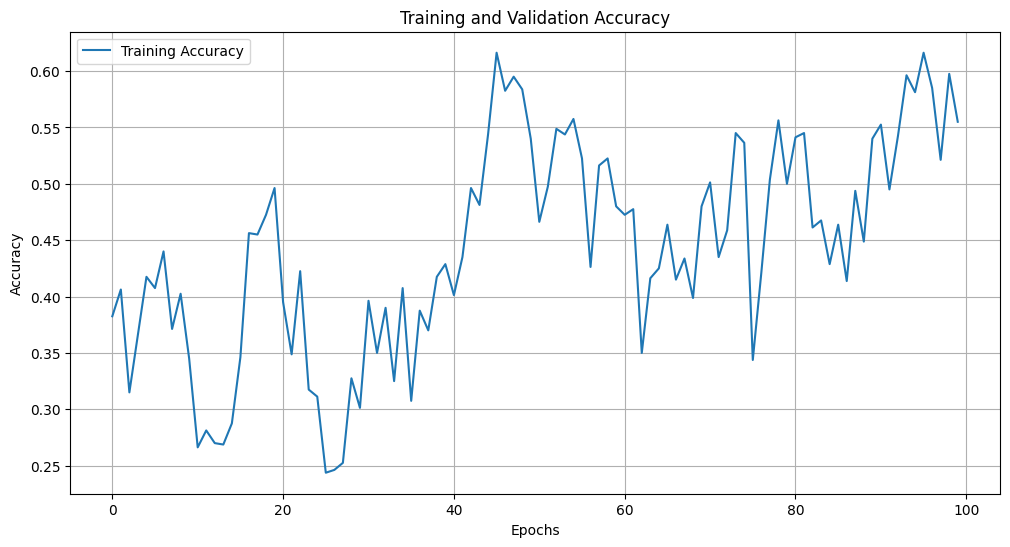

In [16]:
history_dict = history.history
accuracy = history_dict.get('classification_output_accuracy')  # Or use 'classification_output_accuracy' if your metric has a different name
# val_accuracy = history_dict.get('val_accuracy')  # Or use 'val_classification_output_accuracy'

# Plot accuracy
plt.figure(figsize=(12, 6))

plt.plot(accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Class ID: 9
0.41286552 0.56478673 0.068024956 0.109018676


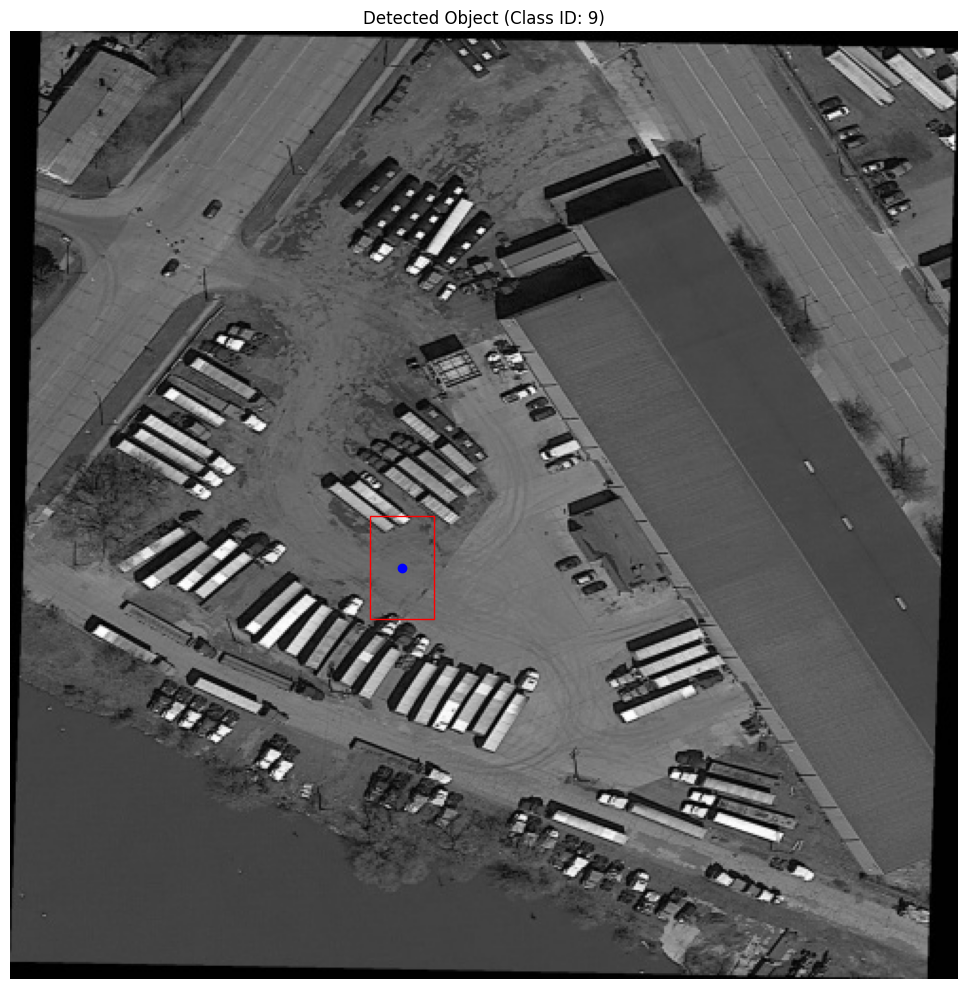

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle

# Load and preprocess the image
image_path = "DOTAv1\\preprocessed_images\\train\\P0013.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Your existing code for prediction
img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_gray = img_gray.astype(np.float32) / 255.0
img_gray = np.expand_dims(img_gray, axis=(0, -1))
predictions = model.predict(img_gray)
class_probs, bounding_boxes = predictions
class_id = np.argmax(class_probs[0][0])
print("Class ID:", class_id)

# Extract bounding box coordinates
bbox = bounding_boxes[0][0]
x, y, w, h = bbox

x_top_left = x - w / 2
y_top_left = y - h / 2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(img)

print(x, y, w ,h)
# Create a Polygon patch
# polygon = Polygon([(x1*400, y1*400), (x2*400, y2*400), (x3*400, y3*400), (x4*400, y4*400)], 
#                   closed=True, fill=False, edgecolor='r', linewidth=2)
rectangle = Rectangle((x_top_left*500, y_top_left*500), w*500, h*500, linewidth=1, edgecolor='r', facecolor='none')
ax.plot(x*500, y*500, 'bo')  # blue dot at the center

# Add the polygon to the plot
ax.add_patch(rectangle)

# Set the title
ax.set_title(f"Detected Object (Class ID: {class_id})")

# Remove axis labels
ax.set_axis_off()

# Show the plot
plt.tight_layout()
plt.show()